In [19]:
import pandas as pd

In [20]:
df = pd.read_csv("COVID-19-jp/newly_confirmed_cases_daily.csv")
df["Date"] = pd.to_datetime(df["Date"] )
print(len(df))
df.tail()

1078


,Date,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
1073,2022-12-24,177795,4907,1604,1689,3529,1053,1212,2366,3571,...,2522,922,8834,1773,1792,3917,2122,2159,2308,973
1074,2022-12-25,149770,3378,1061,1150,3050,636,636,2049,4162,...,1975,667,8113,1353,1702,3074,1812,1782,1963,718
1075,2022-12-26,77296,2128,593,638,1779,328,329,996,3515,...,1018,386,2721,504,686,1350,1256,1023,1221,399
1076,2022-12-27,202853,5928,1956,2200,3470,1467,1522,3232,1323,...,4131,1459,10904,2537,2881,5621,2404,3248,3023,1237
1077,2022-12-28,216219,6042,1546,1623,3875,960,1094,2703,5075,...,2846,1152,12360,2285,2611,4655,3041,2846,3224,1435


### 最新の日付を取得

In [21]:
latest_date = df["Date"].max()
latest_date_str = latest_date.strftime("%Y-%m-%d")

In [22]:
all_jp = df[["Date","ALL"]]
all_jp.tail()

,Date,ALL
1073,2022-12-24,177795
1074,2022-12-25,149770
1075,2022-12-26,77296
1076,2022-12-27,202853
1077,2022-12-28,216219


In [23]:
df.columns.values

array(['Date', 'ALL', 'Hokkaido', 'Aomori', 'Iwate', 'Miyagi', 'Akita',
       'Yamagata', 'Fukushima', 'Ibaraki', 'Tochigi', 'Gunma', 'Saitama',
       'Chiba', 'Tokyo', 'Kanagawa', 'Niigata', 'Toyama', 'Ishikawa',
       'Fukui', 'Yamanashi', 'Nagano', 'Gifu', 'Shizuoka', 'Aichi', 'Mie',
       'Shiga', 'Kyoto', 'Osaka', 'Hyogo', 'Nara', 'Wakayama', 'Tottori',
       'Shimane', 'Okayama', 'Hiroshima', 'Yamaguchi', 'Tokushima',
       'Kagawa', 'Ehime', 'Kochi', 'Fukuoka', 'Saga', 'Nagasaki',
       'Kumamoto', 'Oita', 'Miyazaki', 'Kagoshima', 'Okinawa'],
      dtype=object)

### 都道府県の列だけにする

In [24]:
prefs_h = df.drop("ALL", axis=1)
prefs_h.tail()

,Date,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
1073,2022-12-24,4907,1604,1689,3529,1053,1212,2366,3571,2609,...,2522,922,8834,1773,1792,3917,2122,2159,2308,973
1074,2022-12-25,3378,1061,1150,3050,636,636,2049,4162,2173,...,1975,667,8113,1353,1702,3074,1812,1782,1963,718
1075,2022-12-26,2128,593,638,1779,328,329,996,3515,927,...,1018,386,2721,504,686,1350,1256,1023,1221,399
1076,2022-12-27,5928,1956,2200,3470,1467,1522,3232,1323,3117,...,4131,1459,10904,2537,2881,5621,2404,3248,3023,1237
1077,2022-12-28,6042,1546,1623,3875,960,1094,2703,5075,3034,...,2846,1152,12360,2285,2611,4655,3041,2846,3224,1435


### 都道府県での横持を縦持ちに変換

In [25]:
prefs_h.set_index(["Date"]).tail()

,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,Gunma,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-24,4907,1604,1689,3529,1053,1212,2366,3571,2609,2903,...,2522,922,8834,1773,1792,3917,2122,2159,2308,973
2022-12-25,3378,1061,1150,3050,636,636,2049,4162,2173,2296,...,1975,667,8113,1353,1702,3074,1812,1782,1963,718
2022-12-26,2128,593,638,1779,328,329,996,3515,927,1001,...,1018,386,2721,504,686,1350,1256,1023,1221,399
2022-12-27,5928,1956,2200,3470,1467,1522,3232,1323,3117,3575,...,4131,1459,10904,2537,2881,5621,2404,3248,3023,1237
2022-12-28,6042,1546,1623,3875,960,1094,2703,5075,3034,3322,...,2846,1152,12360,2285,2611,4655,3041,2846,3224,1435


In [26]:
prefs_h.set_index(["Date"]).stack().tail()

Date                 
2022-12-28  Kumamoto     4655
            Oita         3041
            Miyazaki     2846
            Kagoshima    3224
            Okinawa      1435
dtype: int64

In [27]:

prefs_h.set_index(["Date"]).stack().reset_index().tail()

,Date,level_1,0
50661,2022-12-28,Kumamoto,4655
50662,2022-12-28,Oita,3041
50663,2022-12-28,Miyazaki,2846
50664,2022-12-28,Kagoshima,3224
50665,2022-12-28,Okinawa,1435


In [28]:
prefs = prefs_h.set_index(["Date"]).stack().reset_index()
prefs.columns=["Date","Pref","Confirmed"]
prefs.tail()

,Date,Pref,Confirmed
50661,2022-12-28,Kumamoto,4655
50662,2022-12-28,Oita,3041
50663,2022-12-28,Miyazaki,2846
50664,2022-12-28,Kagoshima,3224
50665,2022-12-28,Okinawa,1435


### 7日間移動平均を計算

In [29]:
prefs["Confirmed7DaysMA"] = prefs["Confirmed"].rolling(7).mean()
all_jp["Confirmed7DaysMA"] = all_jp["ALL"].rolling(7).mean()
prefs.tail()

/tmp/ipykernel_3112/2392883738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_jp["Confirmed7DaysMA"] = all_jp["ALL"].rolling(7).mean()


,Date,Pref,Confirmed,Confirmed7DaysMA
50661,2022-12-28,Kumamoto,4655,3996.428571
50662,2022-12-28,Oita,3041,4135.714286
50663,2022-12-28,Miyazaki,2846,4135.714286
50664,2022-12-28,Kagoshima,3224,4431.714286
50665,2022-12-28,Okinawa,1435,2871.000000


### 直近の９０日間のデータを抽出

In [30]:
import datetime
recent_date = pd.to_datetime(datetime.datetime.now()).round("D")- datetime.timedelta(days=90)
all_jp_recent = all_jp.loc[all_jp["Date"]>=recent_date]

### 死者数のデータを読み取り

In [31]:
df = pd.read_csv("COVID-19-jp/number_of_deaths_daily.csv")
df["Date"] = pd.to_datetime(df["Date"] )
print(len(df))
df.tail()

964


,Date,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
959,2022-12-24,339,25,6,6,7,2,2,7,12,...,2,2,17,2,4,9,3,5,0,3
960,2022-12-25,306,23,2,5,7,10,1,0,8,...,5,7,13,3,0,8,3,0,10,0
961,2022-12-26,217,22,2,5,10,4,0,0,3,...,7,3,7,1,2,4,3,9,3,0
962,2022-12-27,271,12,2,4,2,4,1,17,5,...,2,3,6,1,4,3,3,2,4,0
963,2022-12-28,415,38,9,7,13,9,4,6,4,...,4,5,18,6,4,24,4,4,2,0


In [32]:
death = df[["Date", "ALL"]]
death["Confirmed7DaysMA"] = death["ALL"].rolling(7).mean()
death_recent = death.loc[death["Date"]>=recent_date]

/tmp/ipykernel_3112/4107577123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  death["Confirmed7DaysMA"] = death["ALL"].rolling(7).mean()


### グラフを描画

In [33]:
import matplotlib.pyplot as plt
import japanize_matplotlib


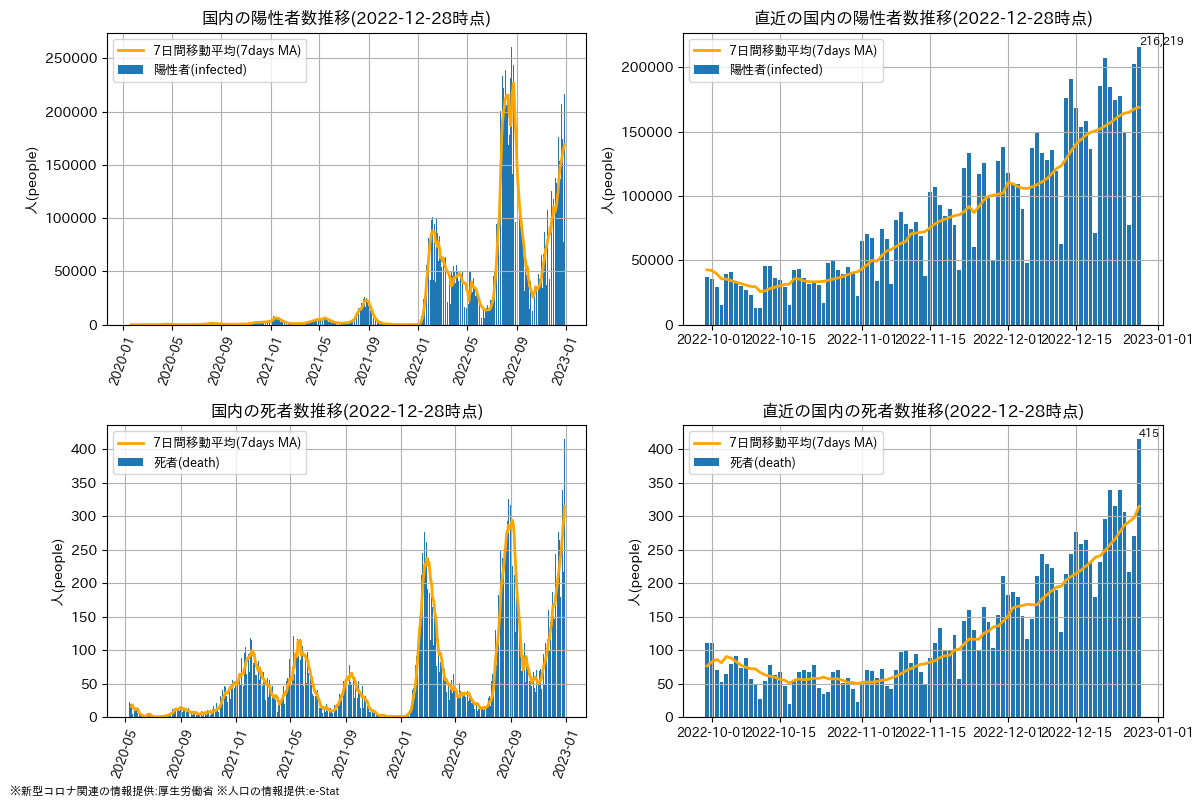

In [34]:
fig = plt.figure(figsize=(12,8))

plt.subplot(2,2,1) # (rows, columns, panel number)
plt.title("国内の陽性者数推移({}時点)".format(latest_date_str))
plt.bar(all_jp["Date"],all_jp["ALL"],label="陽性者(infected)")
# plt.bar(severe["Date"],severe["Severe cases"],label="重症者(severe)")
plt.plot_date(all_jp["Date"],all_jp["Confirmed7DaysMA"],label="7日間移動平均(7days MA)", fmt="-",lw=2.0, color="orange")
plt.tick_params(axis="x",rotation=70, labelsize=9)
plt.ylabel("人(people)")
plt.grid()
plt.legend(fontsize=9)

plt.subplot(2,2,2) # (rows, columns, panel number)
plt.title("直近の国内の陽性者数推移({}時点)".format(latest_date_str))
plt.bar(all_jp_recent["Date"],all_jp_recent["ALL"],label="陽性者(infected)")
# plt.bar(severe_recent["Date"],severe_recent["Severe cases"],label="重症者数(severe)")
plt.plot_date(all_jp_recent["Date"],all_jp_recent["Confirmed7DaysMA"],label="7日間移動平均(7days MA)", fmt="-",lw=2.0, color="orange")
plt.tick_params(axis="x",labelsize=9)
plt.ylabel("人(people)")
plt.grid()
latest_date = all_jp_recent["Date"].max()
latest_value = all_jp_recent.loc[all_jp_recent["Date"]==latest_date,"ALL"].iloc[0]
plt.text(latest_date,latest_value ,"{:,}".format(latest_value),fontsize=8,va="bottom")
#latest_value = severe_recent.loc[severe_recent["Date"]==latest_date,"Severe cases"].iloc[0]
#plt.text(latest_date,latest_value ,"{:,}".format(latest_value),fontsize=8,va="bottom",ha="left")
plt.legend(fontsize=9)

plt.subplot(2,2,3) # (rows, columns, panel number)
plt.title("国内の死者数推移({}時点)".format(latest_date_str))
plt.bar(death["Date"],death["ALL"],label="死者(death)")
plt.plot_date(death["Date"],death["Confirmed7DaysMA"],label="7日間移動平均(7days MA)", fmt="-",lw=2.0, color="orange")
plt.tick_params(axis="x",rotation=70, labelsize=9)
plt.ylabel("人(people)")
plt.grid()
plt.legend(fontsize=9)

plt.subplot(2,2,4) # (rows, columns, panel number)
plt.title("直近の国内の死者数推移({}時点)".format(latest_date_str))
plt.bar(death_recent["Date"],death_recent["ALL"],label="死者(death)")
plt.plot_date(death_recent["Date"],death_recent["Confirmed7DaysMA"],label="7日間移動平均(7days MA)", fmt="-",lw=2.0, color="orange")
plt.tick_params(axis="x",labelsize=9)
plt.ylabel("人(people)")
plt.grid()
latest_date = death_recent["Date"].max()
latest_value = death_recent.loc[death_recent["Date"]==latest_date,"ALL"].iloc[0]
# latest_value = death_recent.loc[death_recent["Date"]==latest_date,"ALL"]
plt.text(latest_date,latest_value ,"{:,}".format(latest_value),fontsize=8,va="bottom")
plt.legend(fontsize=9)

fig.text(0,0,"※新型コロナ関連の情報提供:厚生労働省 ※人口の情報提供:e-Stat",fontsize=8)


fig.tight_layout()


In [35]:
fig.savefig("out/covid-gov-domestic-daily.png",facecolor="white")